#  DSP LAB Experiment 2
Author: P. Ramyashri <br>
Email: pramyshri.191ee138@gmail.com <br>
Roll: 191EE138 <br>
Date: 07/09/2021<br>

GITHUB LINK:https://github.com/ramyashri1887/DSP-LAB 

## Problem 1. (Sampling and frequency-domain aliasing)

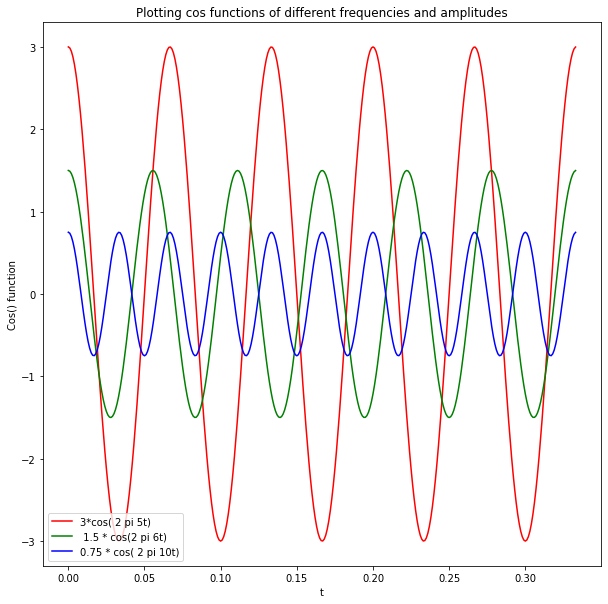

<Figure size 460.8x345.6 with 0 Axes>

In [32]:
#1 plotting the following in one plot 
import numpy as np
import matplotlib.pyplot as plt
alpha= 1+138%4

#time axis discretisation 
t=np.arange(0,(1/alpha),0.001)

#definition of the function 
def f(sf_amplitude, sf_freq,t):#sf_amplitude = scaling factor for amplitude, sf_freq=scaling factor for frequency 
    return (alpha*sf_amplitude)*np.cos(2*np.pi*alpha*sf_freq*t)

fig, ax = plt.subplots(figsize=[10,10]) 
plt.figure()
ax.plot(t,f(1,5,t),'r', label= '3*cos( 2 pi 5t)')
ax.plot(t,f(0.5,6,t),'g', label=' 1.5 * cos(2 pi 6t)')
ax.plot(t,f(0.25,10,t),'b', label='0.75 * cos( 2 pi 10t)')
ax.set(title='Plotting cos functions of different frequencies and amplitudes', ylabel='Cos() function',xlabel='t')
leg = ax.legend()


plt.show()




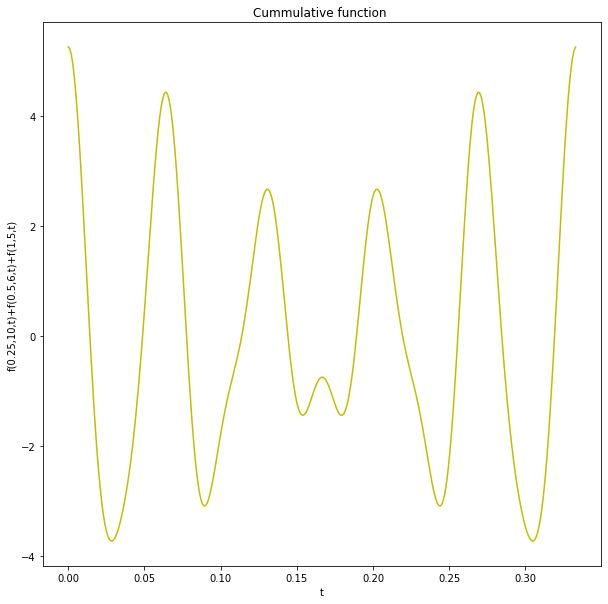

In [7]:
# 2 Plot the summation of all the three functions in another figure.
sum= f(0.25,10,t)+f(0.5,6,t)+f(1,5,t)

plt.plot(t,sum,'y')
plt.xlabel("t")
plt.ylabel("f(0.25,10,t)+f(0.5,6,t)+f(1,5,t)")
plt.title("Cummulative function ")
plt.rcParams["figure.figsize"] = (10,10)

plt.show()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

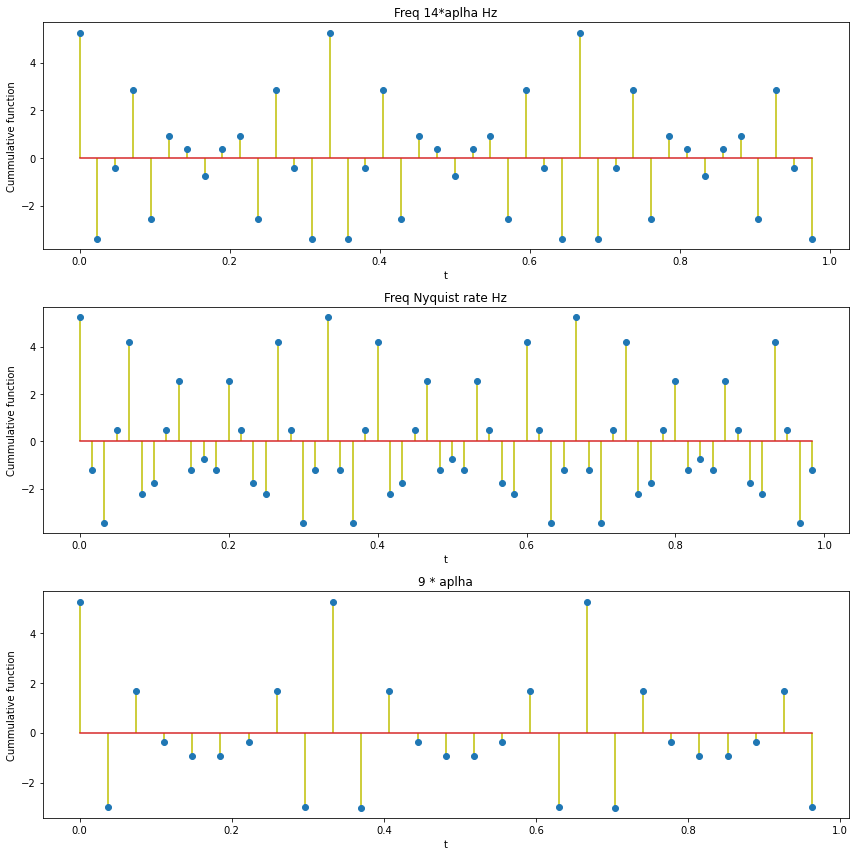

In [8]:
Fs=14*alpha
t1=np.arange(0,1,1/Fs)
Nr=20*alpha
t2=np.arange(0,1,1/Nr)
af=9*alpha
t3=np.arange(0,1,1/af)

sumt1= f(0.25,10,t1)+f(0.5,6,t1)+f(1,5,t1)
sumt2=f(0.25,10,t2)+f(0.5,6,t2)+f(1,5,t2)
sumt3=f(0.25,10,t3)+f(0.5,6,t3)+f(1,5,t3)


fig, (ax1,ax2,ax3)=plt.subplots(3,figsize=[12,12])
ax1.stem(t1,sumt1,'y')
ax1.set(title='Freq 14*aplha Hz', ylabel='Cummulative function',xlabel='t')

#stem plot 
ax2.stem(t2,sumt2,'y')
ax2.set(title='Freq Nyquist rate Hz', ylabel='Cummulative function',xlabel='t')

ax3.stem(t3,sumt3,'y')
ax3.set(title='9 * aplha', ylabel='Cummulative function',xlabel='t')


plt.tight_layout()
plt.show()


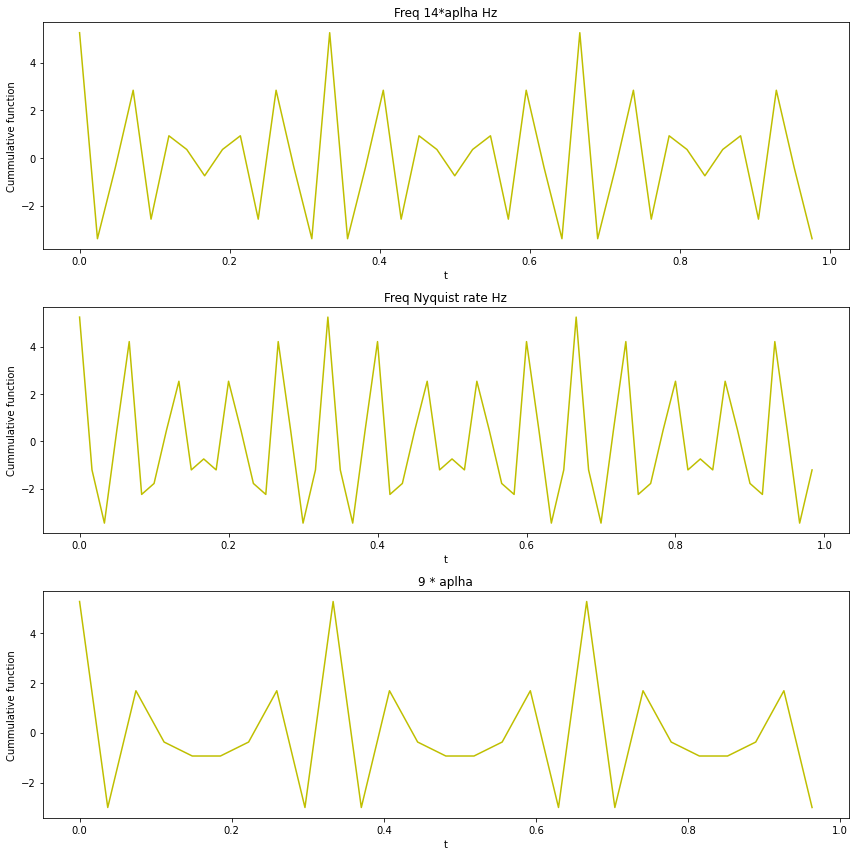

In [9]:
fig, (ax1,ax2,ax3)=plt.subplots(3,figsize=[12,12])
ax1.plot(t1,sumt1,'y')
ax1.set(title='Freq 14*aplha Hz', ylabel='Cummulative function',xlabel='t')

#stem plot 
ax2.plot(t2,sumt2,'y')
ax2.set(title='Freq Nyquist rate Hz', ylabel='Cummulative function',xlabel='t')

ax3.plot(t3,sumt3,'y')
ax3.set(title='9 * aplha', ylabel='Cummulative function',xlabel='t')


plt.tight_layout()
plt.show()


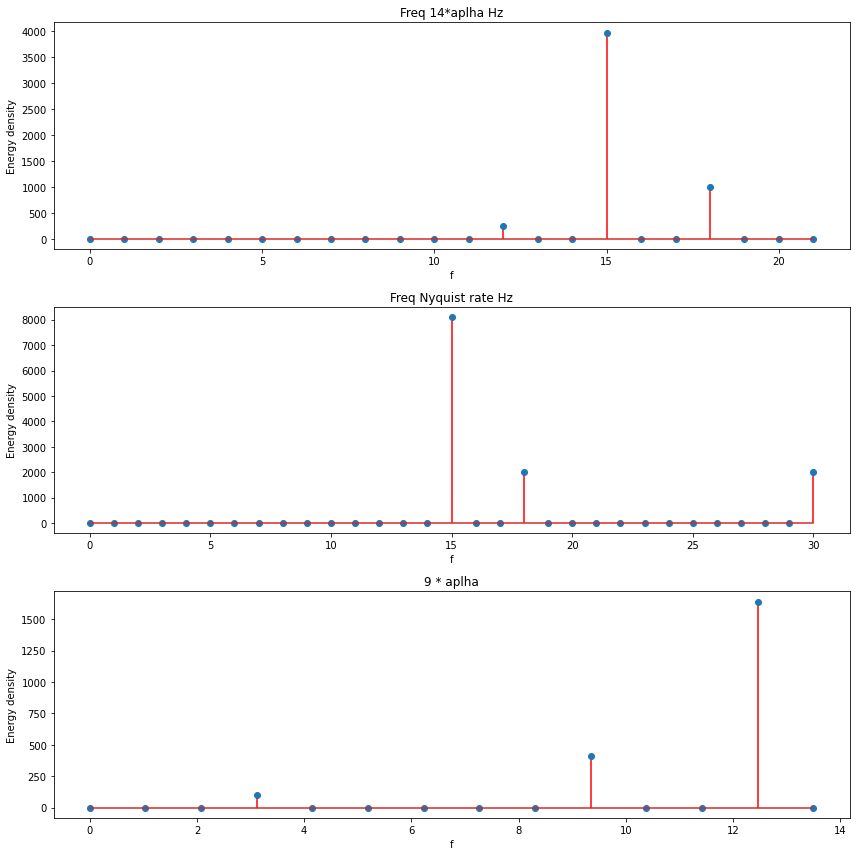

In [11]:
#1.5
fourier_transform_1 = np.fft.rfft(sumt1)
abs_fourier_transform_1 = np.abs(fourier_transform_1)
power_spectrum_1= np.square(abs_fourier_transform_1)
frequency_1= np.linspace(0, Fs/2, len(power_spectrum_1))

fourier_transform_2 = np.fft.rfft(sumt2)
abs_fourier_transform_2 = np.abs(fourier_transform_2)
power_spectrum_2= np.square(abs_fourier_transform_2)
frequency_2= np.linspace(0, Nr/2, len(power_spectrum_2))

fourier_transform_3 = np.fft.rfft(sumt3)
abs_fourier_transform_3 = np.abs(fourier_transform_3)
power_spectrum_3= np.square(abs_fourier_transform_3)
frequency_3= np.linspace(0, af/2, len(power_spectrum_3))

fig, (ax1,ax2,ax3)=plt.subplots(3,figsize=[12,12])
ax1.stem(frequency_1, power_spectrum_1,'r')
ax1.set(title='Freq 14*aplha Hz', ylabel='Energy density',xlabel='f')

#stem plot 
ax2.stem(frequency_2, power_spectrum_2,'r')
ax2.set(title='Freq Nyquist rate Hz', ylabel='Energy density',xlabel='f')

ax3.stem(frequency_3, power_spectrum_3,'r')
ax3.set(title='9 * aplha', ylabel='Energy density',xlabel='f')


plt.tight_layout()
plt.show()


## Problem 2. (Generating digital music)


In [29]:
#my approach 

import librosa, scipy
import IPython.display as ipd

from scipy.io.wavfile import write
#def sr(samples_sec):
    
t=np.arange(0,1,0.0001)
def f(f):
    return np.sin(2*np.pi*f*t)

freq=[261.626,294.33,327.03,348.83,392.44,436.04,490.55,523.25]

x=f(freq[0])
x

for i in range(7):
    x=np.append(x,f(freq[i+1]))
ipd.Audio( x, rate=Fs)


#write('doremi.wav', Fs, x.astype(np.float32))




In [20]:
#gitlab approach 
frequencies = np.array([525, 590, 664, 704, 790, 885, 995, 1055])
Fs = 16000
tone_sound = []

for itr in range(len(frequencies)):
    t = np.arange(0.5*(itr-1), 0.5*itr, 1/Fs)
    tone_sound = np.hstack([tone_sound, np.sin(frequencies[itr]*2*np.pi*t)])
    
ipd.Audio(tone_sound, rate=Fs/2)

#wavfile.write('doremi.wav', Fs, tone_sound)

## Problem 3. (Resampling)


In [14]:
import librosa, scipy
import scipy.signal as sps
x, sr = librosa.load('Track003.wav')
ipd.Audio(x, rate=sr)
len(x)

374960

In [15]:
index1=np.arange(0,len(x),2)
for i in index1:
    xby2=np.delete(x,index1)

In [17]:
index2=np.arange(0,len(x),3)
for i in index2:
    xby3=np.delete(x,index2)

In [18]:
ipd.Audio(xby2, rate=sr/2) #17 second video 

In [19]:
ipd.Audio(xby3, rate=sr/3) #17 second video 